In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

#### Bayesian Decision Theory Cheatsheet

Risk of the estimator (or action) is the expected loss assuming that the true parameter, which is known, is $\theta$. Recall that an estimator is a function of data $x$, which is a random variable, parameterized by $\theta$. Given data $x$ an estimator returns $\hat{\theta}$, an estimate of $\theta$. Risk is a function of $\theta$, and it is difficult to compare two estimators/actions, since one estimator often does better than the other for certain values of $\theta$ but not at others.

We can instead get a one number summary of the risk in two ways. The first is by taking the expectation of the risk with respect to some prior $f(\theta)$. In other words, it is the expected loss under the prior $f(\theta)$ for a particular decision strategy $h(D)$. This is called the Bayes risk, and it requires that one bring in a subjective belief by way of the prior. The other way is to compute the maximum risk, which is the worst case scenario under this particular estimator/action.

(Define posterior risk, and how it's related to the Bayesian risk.)
So what is our $a$ here? If we're to draw an analogy with the estimator, estimator is a function of data. It seems that action here (

#### Summary of the method presented in this paper
Let $\mathcal{R}_{p_D}$ be the posterior risk under the true posterior $p_D$. Since we are talking about a posterior, we have already observed some data $D$. The decision $h$ is a function of the data $h(D)$. Of all the decisions (think  estimators if that's easier) that are possible, choose one that minimizes the posterior risk. For comparing estimators, think the MAP vs MLE estimators in a series of coin tosses. The true parameter $\theta$ may vary but, once we specify the prior $p(\theta)$, we can get a one number summary, Bayes risk, of the estimator.

Yes, behind the scenes, computing the risk involves marginalizing over the data, which is drawn according to the true parameter $\theta$. I guess the posterior itself would be a function of the data, so in so much as that it gives you a decision (estimation) given data, minimizing the posterior risk will give you a function $h(D)$. And the theorem says that the function we obtain thus is exactly the h that, out of all possible functions, minimizes $R(\theta, h) = \int L(h, \theta)p(x|\theta) dx$ marginalized with respect to some prior $f(\theta)$, and under the assumption that the data is generated according to the likelihood model $p(x|\theta)$.

Then we can arrive at a different decision $h(D)$ if we used instead of the exact posterior, which is often intractable, an approximate to the posterior. This is called a q-optimal action $h_q(D) = \mathrm{argmin} R_q(h)$. Note the dependence of $h_q$ on the data $D$.

Having obtained the decision $h_q(D)$ we can compare this to the optimal posterior decision $h_{p_D}$. In the case of nuclear reactor it's a little silly - data $D$ is fixed, $h(D)$ here is either "on" or "off", thus as long as $h_q$ decides "off", we have found a decision-aware optimal $q$. In particular, there may be many such optimal q's, as they note in the paper. In reality, though, $D$ is not fixed but rather generated according to the likelihood $p(X|\theta)$, and $h_q(D)$ must replicate $h_{p_D}$ as best it can for all possible values of $D$.

In the loss-calibrated variational framework we minimize $d_L(p||q) = R_p(h_q) - R_p(h_p) = \int L(\theta, h_q) p(\theta|X) d\theta - \int L(\theta, h_p) p(\theta|X) d\theta$ instead of $KL(q||p)$. Note that in the particular case of, if both $h_q$ and $h_p$ is off, then the loss is minimzed (at 0). Now to minimize $d_L$ via gradient descent, the loss function must be made continuous somehow, and we must also think about how to handle the argmin. 

#### Nuclear Reactor Problem

Here we consider the nuclear reactor problem presented in the paper.

We have a bimodal posterior $p(\theta|X) = 0.6 \mathcal{N}(30, 10) + 0.4 \mathcal{N}(70, 10)$, and we would like to approximate this by some unimodal Gaussian $q(\theta) \sim \mathcal{N}(m, \sigma^2)$. Note that here we have side-stepped the prior $p(\theta)$ and likelihood $p(X|\theta)$ by explicitly defining the posterior but know that they are there in the background.

Given a posterior over $\theta$, we may calculate the posterior risk $R_{p_D}(a) = \int_\theta L(\theta, a) p(\theta|X) d\theta$ of action a. This is related to bayes risk under prior $f(\theta)$, which is the risk (expected loss, $R(\theta, a) = \int L(\theta, a) p(x|\theta) dx$ ) with $\theta$ marginalized wrt $f$, of action $a$ in that the action (or estimator - does it generalize to non-estimation problems?) that minimizes the posterior risk minimizes bayes risk. Note that the posterior risk is a function of action $a \in \{ \text{'on'}, \text{'off'} \}$. We will define the loss $L(\theta, a)$ as:

$L(\theta < T_{crit}, 'on') = 0$

$L(\theta < T_{crit}, 'off') = 10$

$L(\theta \geq T_{crit}, 'on') = 1000$

$L(\theta \geq T_{crit}, 'off') = 10$

where $T_{crit}$ is the threshold temperature above which the nuclear meltown takes place if the reactor stays on. The loss for this case is high, while there also is a relatively small loss incurred for turning off the plant. Then, for the particular posterior $p(\theta|X)$ above, and $T_{crit} = 80$, we have 

$R_{p_D}('on') = \int^{\infty}_{T_{crit}} 1000 [0.6 \mathcal{N}(\theta|30, 10) + 0.4 \mathcal{N}(\theta|70, 10)] d\theta \approx \int^{\infty}_{T_{crit}} 1000 [0.4 \mathcal{N}(\theta|70, 10)] d\theta $ 

$R_{p_D}('off') = \int_{-\infty}^{\infty} 10 [0.6 \mathcal{N}(\theta|30, 10) + 0.4 \mathcal{N}(\theta|70, 10)] d\theta = 10$

As shown in the worksheet below, $R_{p_D}('on') \approx 100$. If our strategy is to minimize Bayes risk, we would choose to turn the reactor off.

0.10017949287508951
R(on) = 100.17949287508951
R(off) = 10


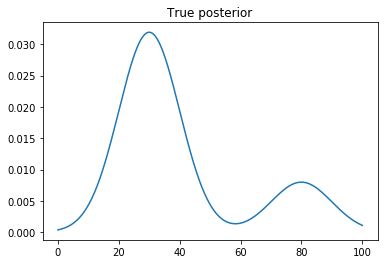

In [5]:
from scipy.stats import norm

### Plot the true posterior: 1 is the larger mode
T_crit = 80.0
u1, u2 = T_crit, 30
v1, v2 = 10**2, 10**2
w1, w2 = 0.2, 0.8
xmin, xmax, num_points = 0, 100, 1000
x = np.linspace(xmin, xmax, num_points)
posterior = lambda t: w2 * norm.pdf(t, u2, np.sqrt(v2)) + w1 * norm.pdf(t, u1, np.sqrt(v1))
plt.plot(x, posterior(x))
plt.title("True posterior")
# Make sure that the posterior is normalized
# print(np.sum(posterior(x) * xmax/num_points))

### define loss function
L_below_on = 0
L_above_on = 1000
L_off = 10

## R('on'). Ignore the negligible contribution from the lower mode
num_points = 1000.0
max_temp = 150.0
dx = (max_temp - T_crit) / num_points

R_on = L_above_on * np.sum(posterior(np.linspace(T_crit, max_temp, 1000)) * dx)
print np.sum(posterior(np.linspace(T_crit, max_temp, 1000)) * dx)
## R('off')
R_off = L_off

print('R(on) = ' + str(R_on))
print('R(off) = ' + str(R_off)) 

Now, suppose that we did not have access to the true posterior and instead used variational methods to approximate the posterior. This we can do by, among others, minimizing KL divergence between the true posterior $p$ and $q$.

q that minimizes $KL(q||p)$ will pick out the larger of the two modes, therefore $q(\theta) = \mathcal{N}(\theta|30,80)$ (80 was chosen by eye).


R(on) = 1.1342374262035548e-05
R(off) = 10
Estimated risk is really low


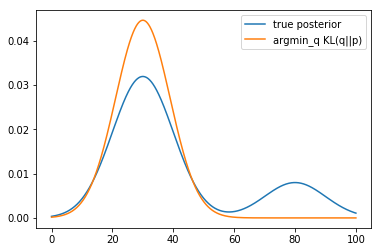

In [6]:
u_q = 30
v_q = 80
plt.plot(x, posterior(x), label="true posterior")
plt.plot(x, norm.pdf(x, u_q, np.sqrt(v_q)), label="argmin_q KL(q||p)")
plt.legend()

## R('on')
R_on = L_above_on * (1-norm.cdf(T_crit, u_q, np.sqrt(v_q)))

## R('off')
R_off = L_off

print('R(on) = ' + str(R_on))
print('R(off) = ' + str(R_off))
print("Estimated risk is really low")

#### Finding the approximate posterior $q(\theta|\phi)$

(Aside) I'm uncomfortable going directly to minimizing the KL between the exact and approximate. But minimizing $KL(p(\theta|X)||q(\theta))$ must maximize the model evidence $p(X)$. This makes me wonder what $q(\theta)$ is. It is some distribution of the latent variable $\theta$ that, when it's KL divergence with the true posterior is smallest, ELBO becomes closer to the model evidence, which is a constant given data. So finding the $q(\theta)$ that maximizes the ELBO is useful in estimating the model evidence, because the exact computation of model evidence is intractable. But whether this is a good idea in terms of approximating the posterior is far from clear. Maybe this gets to the fact that approximating a distribution is not trivial and is there may be many ways of doing so. For instance there's the difference between KL(p||q) vs KL(q||p). And even that isn't the full story. In EP, for example, the aim is to minimize KL(p||q), which if q is of exponential family then reduces to moment matching. But finding the moments of p is itself intractable. Thus we must do moment matching for each factor, with respect to how the exact likelihood function interacts with the cavity, etc. In sum, accept that reducing KL(q||p) is one of many ways in which we can approximate the true posterior. Although it's arbitrary in some sense it is at least sensible, and I suspect that it makes the math clean compared to other methods.

(Aside 2: minimizing KL) $KL(q(\theta)||p(\theta|x)) = - \int_\theta q(\theta) \ln p(\theta|x) + \int_\theta q(\theta) \ln q(\theta) = - \mathbb{E}_q \ln p(\theta|x) + \mathbb{E}_q \ln q(\theta)$. We take the gradient of these expectations, set it to 0, then solve for the parameters of q, which we call $\phi$. 

This we can do in two ways. Black box variational inference rewrites the gradient of the ELBO as the expectation of terms that depend on the gradient of $log q(z|\lambda)$. The expectation is with respect to $q(z|\lambda)$ where $\lambda$ is the current estimate at that iteration. We can get an unbiased estimate of this expectation (and therefore the gradient of the ELBO) by sampling from the current estimate of $q(z|\lambda)$.

Another way is the reparametrization trick described in the variational autoencoder paper. This seems like just finding the mapping from a simpler function (unit Gaussian) to a more complicated $q$. I believe this can be done by matching the CDF.

But in our case q is simple and we can directly sample from q to get the unbiased estimate of KL(q||p) if only we can move the gradient inside the expectation.

##### Log derivative Trick
To learn the approximate posterior by stochastic gradient descent, we want an unbiased estimater of the gradient of the KL divergence between the exact posterior and the approximate:

$\nabla_{\phi} KL(q||p) = \nabla_{\phi} \big( - \mathbb{E}_q \ln p(\theta|x) + \mathbb{E}_q \ln q(\theta|\phi) \big)$

The second term is the entropy of $q$ and has a simple form: $\nabla_{\phi} \mathbb{E}_q \ln q(\theta|\phi) = \nabla_{\phi} (1/2) \ln (2\pi e v)$. Namely its derivative with respect to the Gaussian mean $\mu$ is 0.

The first term we may use the log derivative trick to rewrite as $- \nabla_{\phi} \mathbb{E}_q \ln p(\theta|x) = - \mathbb{E}_q \ln p(\theta|x) \nabla_\phi \ln q(\theta|\phi)$. Note that this is more than just swapping the order of the gradient and the integral, for had we done that the integral would no longer be an expectation, and leaving an expectation of a sample we can draw sample from is key. In our case we don't actually need to do reparametrization because sampling from our $q$, a normal distribution, is easy.

Now in our case, we have

$\frac{d}{d\mu} \ln q(\theta|\phi) = \frac{d}{d\mu} - (1/2v)(\theta-\mu)^2 = (\theta - \mu)/v$

$\frac{d}{dv} \ln q(\theta|\phi) = \frac{d}{dv} - (1/2) \ln (2\pi v) - (1/2v)(\theta-\mu)^2 = -(1/2v) + (\theta - \mu)^2 (1/2v^2)$

Thus we have

$\nabla_{\mu} KL(q||p) = \nabla_{\mu} \big( - \mathbb{E}_q \ln p(\theta_i|x) + \mathbb{E}_q \ln q(\theta|\phi) \big) = -1/S \sum_{i} \ln p(\theta|X)(\theta_i - \mu)/v$

$\nabla_{v} KL(q||p) = \nabla_{v} \big( - \mathbb{E}_q \ln p(\theta_i|x) + \mathbb{E}_q \ln q(\theta|\phi) \big) = -1/S \sum_{i} \ln p(\theta|X) [ -(1/2v) + (1/2v^2)(\theta-\mu)^2 ] + (1/2v)$

OK but I suspect this is different from auto differentiation. I think with auto differentiation we can skip all of this. Well, let's try them all. That's where I will start tomorrow.





To read:
* (Ghahramani and Beal 2001): Closed form coordinate ascent for conjugate exponential family model: http://mlg.eng.cam.ac.uk/zoubin/papers/nips00beal.pdf



51.400288215997605

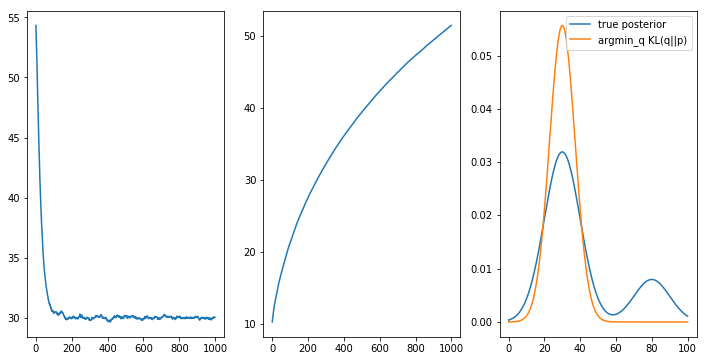

In [136]:
### do stochastic gradient descent
num_iterations = 1000
# the number of monte-carlo samples
S = 5000
u, v = 55, 10
us = np.zeros(num_iterations)
vs = np.zeros(num_iterations)
lr = 4

# sample theta from the current estimate of the posterior
for i in np.arange(num_iterations):
    theta = np.random.normal(u, np.sqrt(v), S)
    dKL_u = -(1.0/S)*np.sum(np.log(posterior(theta))*(theta-u)/v)
    dKL_v = -(1.0/S)*np.sum(np.log(posterior(theta))*(-(1.0/(2*v)) + (1.0/(2*v**2))*(theta-u)**2) + (1.0/(2*v)))
    
    u = u - lr*dKL_u
    v = v - lr*dKL_v

    us[i] = u
    vs[i] = v

# Aside: what's unusual about this construction is that we have the analytical expression of the true posterior.
# Normally in variational inference, we don't have this, or else we know it only up to a constant of proportionality.

u_min_kl = u
x = np.linspace(0,100,1000)
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.plot(np.arange(num_iterations), us, label="mean")
plt.subplot(1,3,2)
plt.legend()
plt.plot(np.arange(num_iterations), vs, label="variance")
plt.subplot(1,3,3)
plt.legend()
plt.plot(x, posterior(x), label="true posterior")
plt.plot(x, norm.pdf(x, u, np.sqrt(v)), label="argmin_q KL(q||p)")
plt.legend()
v

### Mike's solution

In [123]:
import autograd.numpy as np
import autograd
from autograd.scipy.stats import norm


In [174]:
loss_critical = [100, 2] # [ on, off ]
loss_not_critical = [0, 2]
posterior = lambda t: w2 * norm.pdf(t, u2, np.sqrt(v2)) + w1 * norm.pdf(t, u1, np.sqrt(v1))
lr = 0.1

def L(u, sigma):
    pass

# initialize u, sigma
u = 60.0
sigma = 10.0
beta = 200.0

num_iterations = 50
num_samples = 1000

history = { metric : np.zeros(num_iterations) for metric in ['dL_u', 'dL_sigma', 'risk', 'u', 'sigma', 'h']}

for i in np.arange(num_iterations):
    # sample from the true posterior, which is a mixture of Gaussians   
    zs = np.random.binomial(1, w1, num_samples) # z = 1 then it's sampled from the Gaussian on the right (higher temp)
    theta = np.array([np.random.normal(u1, np.sqrt(v1)) if z == 1 else np.random.normal(u2, np.sqrt(v2)) for z in zs])
    critical = theta > T_crit
    
    # the index into the decision h is [on, off]
    # note h doesn't depend on theta
    def h(params):
        u = params[0]
        sigma = params[1]
        p = norm.cdf(T_crit, u, sigma)
        return np.exp(beta*np.array([p, 0.98])) / np.sum(np.exp(beta*np.array([p, 0.98])))

    # loss has shape (num_samples, 2)
    loss = np.array([ loss_critical if c else loss_not_critical for c in critical])
    
    # A Jacobian has dimension (output, input)
    dh = autograd.jacobian(h)
    dL = (1.0/num_samples)*np.sum(np.dot(loss, dh(np.array([u, sigma]))), axis=0)
    posterior_risk = (1.0/num_samples)*np.sum(np.dot(loss, h(np.array([u, sigma]))))
    
    # dh_s = autograd.grad(h_sigma)
    history['dL_u'][i] = dL[0]
    history['dL_sigma'][i] = dL[1]
    history['u'][i] = u
    history['sigma'][i] = sigma
    
    history['risk'][i] = posterior_risk
    history['h'][i] = h(np.array([u, sigma]))[0]
                        
    # update params
    u = u - lr*dL[0]
    sigma = sigma - lr*dL[1]


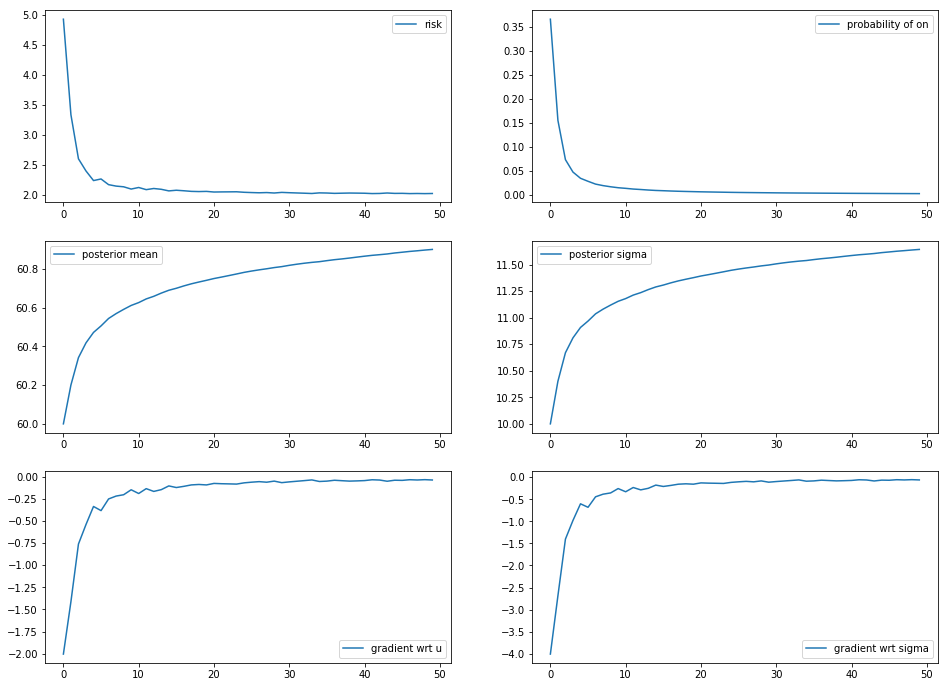

In [175]:
# plot history
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
plt.plot(np.arange(num_iterations), history['risk'], label="risk")
plt.legend()

plt.subplot(3,2,2)
plt.plot(np.arange(num_iterations), history['h'], label="probability of on")
plt.legend()

plt.subplot(3,2,3)
plt.plot(np.arange(num_iterations), history['u'], label="posterior mean")
plt.legend()

plt.subplot(3,2,4)
plt.plot(np.arange(num_iterations), history['sigma'], label="posterior sigma")
plt.legend()


plt.subplot(3,2,5)
plt.plot(np.arange(num_iterations), history['dL_u'], label="gradient wrt u")
plt.legend()

plt.subplot(3,2,6)
plt.plot(np.arange(num_iterations), history['dL_sigma'], label="gradient wrt sigma")
plt.legend()

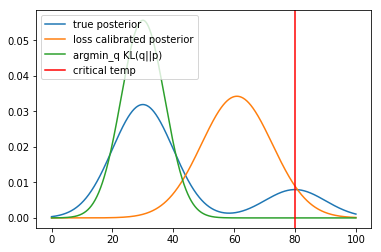

In [176]:
plt.plot(x, posterior(x), label="true posterior")
plt.plot(x, norm.pdf(x, u, sigma), label="loss calibrated posterior")
plt.plot(x, norm.pdf(x, u_min_kl, np.sqrt(v)), label="argmin_q KL(q||p)")
plt.axvline(x=T_crit, color="red", label="critical temp")
plt.legend(loc="upper left")